In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Predicting House Prices

### Project Goal
In this project I want to use regression techniques {INSERT MODELS} to build a model that predicts house prices based on the characteristics of a house. I want to compare the performance of the different models to see which suits this problem the best.

### Introduction


### Data Source
The data can be found with detailed descriptions for the features at: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

### Conclusion





---
---
## 1. Getting familiar with the data


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score


pd.set_option('display.max_columns', 500)

In [3]:
# Loading the train and test data
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Making a new column in train and test sets to index them so they can be split later
train['key'] = 'train'
test['key'] = 'test'

# Joining the test and train data together
all_data = pd.concat([train, test]).reset_index(drop=True)

In [4]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,key
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [5]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

Observations:
- We have 81 columns of which there are 37 numerical columns (not including `Id` column) and 44 categorical columns.
- There is an `Id` column which is redundant therefore can be removed.
- Lots of missing values that will have to be dealt with.

Lets have a look at our target variable which is `SalePrice`:

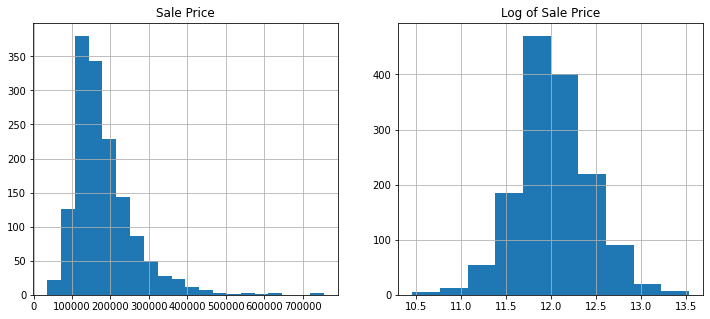

In [6]:
# Creating a variable that is just the target variable
target = train['SalePrice']

# Adding new column to train and all_data datasets which is the log of the sale price
train['LogSalePrice'] = np.log1p(train['SalePrice'])
all_data['LogSalePrice'] = np.log1p(train['SalePrice'])
target_log = train['LogSalePrice']

# Creating a plot to have histograms of `SalePrice` and `LogSalePrice` on same plot
fig = plt.figure(figsize=(12,5))

# Histogram subplot of `SalePrice`
plt.subplot(1,2,1)
target.hist(bins=20)
plt.title('Sale Price')

# Histogram subplot of `LogSalePrice`
plt.subplot(1,2,2)
target_log.hist()
plt.title('Log of Sale Price')

plt.show()


Here we can see the distribution for the target variables and the distrbution of the log of the target variable which results in a normalised distribution. We will use the log of sale price as our target variable so that our model performs better when predicting higher value sale prices.

# 2. Exploratory Data Analysis

### 2.1 Numerical data

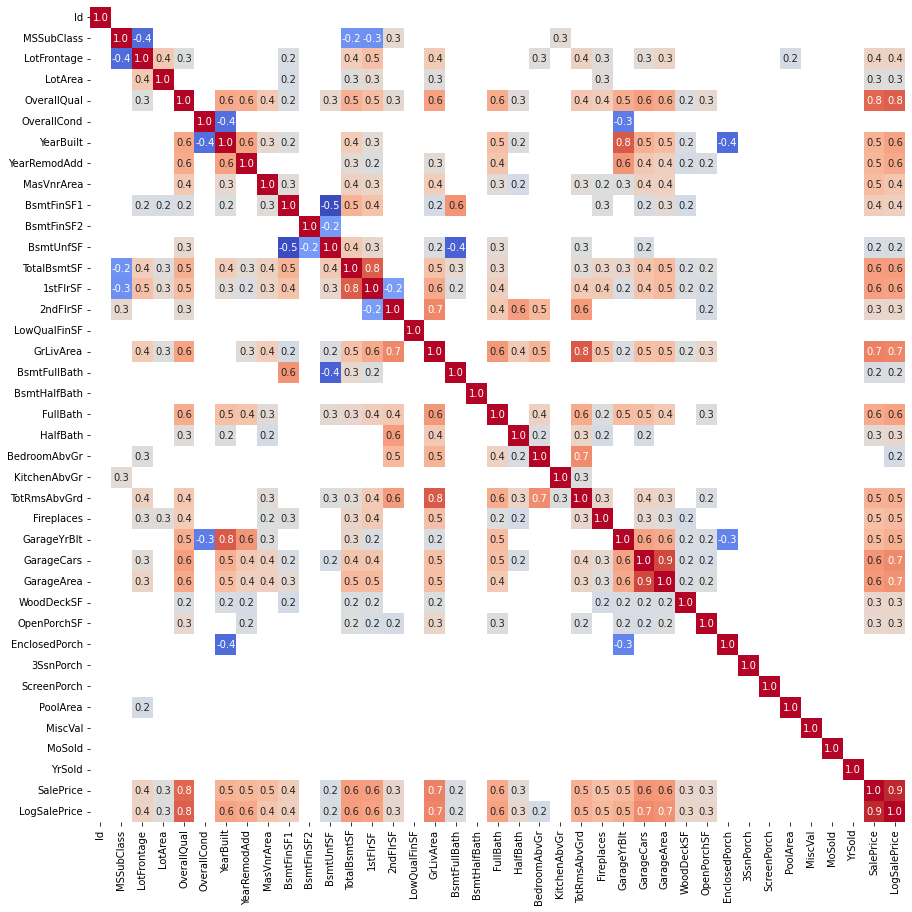

In [7]:
# Creating a heatmap to look at linear correlations between the columns
correlations = train.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(correlations[abs(correlations) > 0.2], cmap='coolwarm', annot=True, fmt='.1f',square=True, cbar=False)
plt.show()

From the heatmap we can see lots of features that `LogSalePrice` correlates with. We can also see some patterns in what is correlating highly with our target variable.
- Area or size related features: `LotFrontage`, `BsmtFinSF1`, `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, `GrLivArea`, `WoodDeckSF`, `OpenPorchSF`.
- Quality or condition related features: `MSSubClass`, `OverallQual`
- How old the building is: `YearBuilt`, `YearRemodAdd`, `GarageYrBlt`
- The houses features: `FullBath`, `HalfBath`, `TotRmsAbvGrd`, `Fireplaces`

These categories of features could possibly be used for feature engineering. For example, creating a feature that is total area adding together living area, basement area etc.

Let's look at how the features that have a correlation of greater than 0.2 relate to our target variable with some scatterplots, we will use `SalePrice` instead of `LogSalePrice` so that the graphs are more interpretable.

In [8]:
# Creating a list of numerical features identified from the heatmap as being correlated with target variable
num_corr = correlations['SalePrice'][abs(correlations['SalePrice']) > 0.2].index
num_corr = num_corr.drop(['SalePrice', 'LogSalePrice'])
num_corr = list(num_corr)

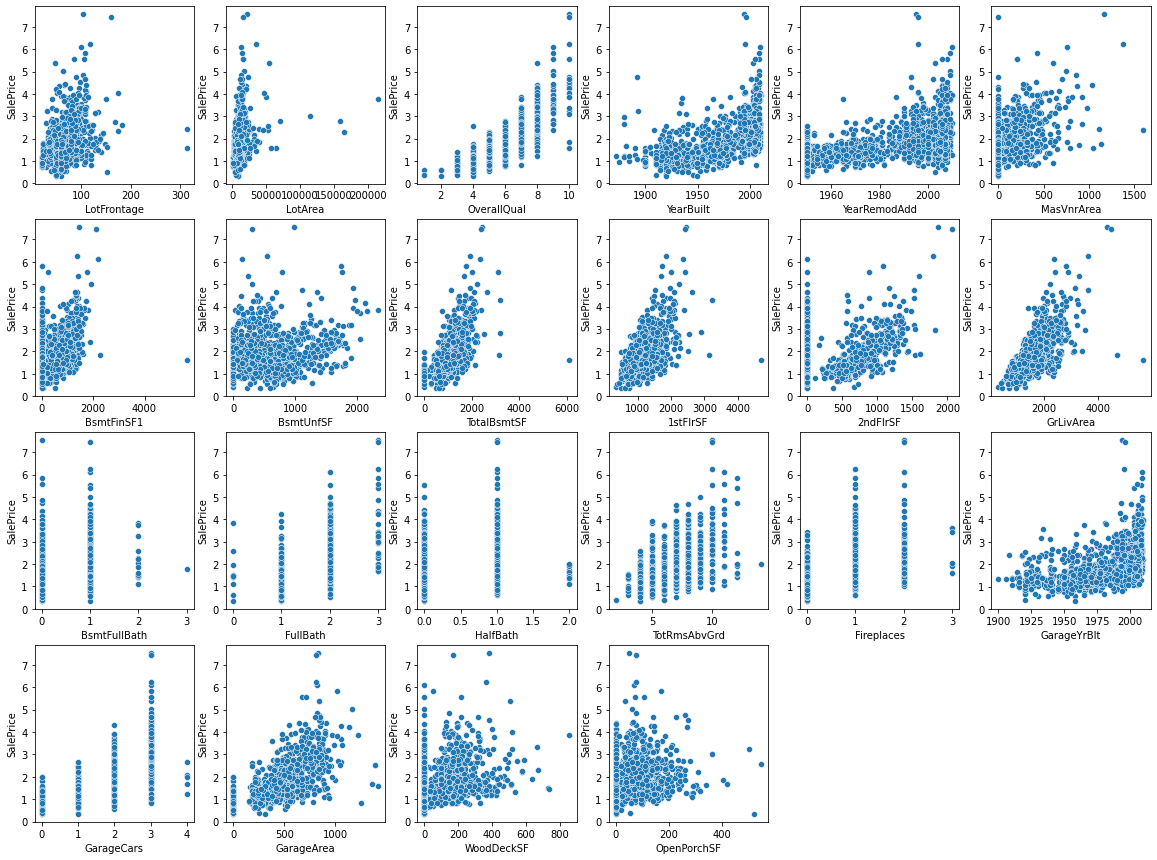

In [9]:
fig = plt.figure(figsize=(20,15))

for ind, col in enumerate(num_corr):
    ax = plt.subplot(4,6,ind+1)
    sns.scatterplot(data=train, x=train[col], y=train['SalePrice']/100000)
    

Observations:

- We can see possible outliers in some plots: `LotFrontage`, `LotArea`, `MasVnrArea`, `BsmtFinSF1`, `TotalBsmtSF`, `1stFlrSf`, `GrLivArea`, `OpenPorchSF`

These outliers should be investigated further and some removed (see section 4). A lot of them seem to come from properties that have a feature that refers to a characteristic which is related to area but does not seem to follow the trend of larger area meaning a higher price. This could be due to properties that are in the countryside, or farms etc.

- Lots of features have points at the zero value, clearly because the house lacks a certain feature: `YearRemodAdd`, `MasVnrArea`, `BsmtFinSF1`, `BsmtUnfSF`, `TotalBsmtSF`, `2ndFlrSf`, `GarageArea`, `WoodDeckSF`, `OpenPorchSF`



## 2.2 Categorical Data

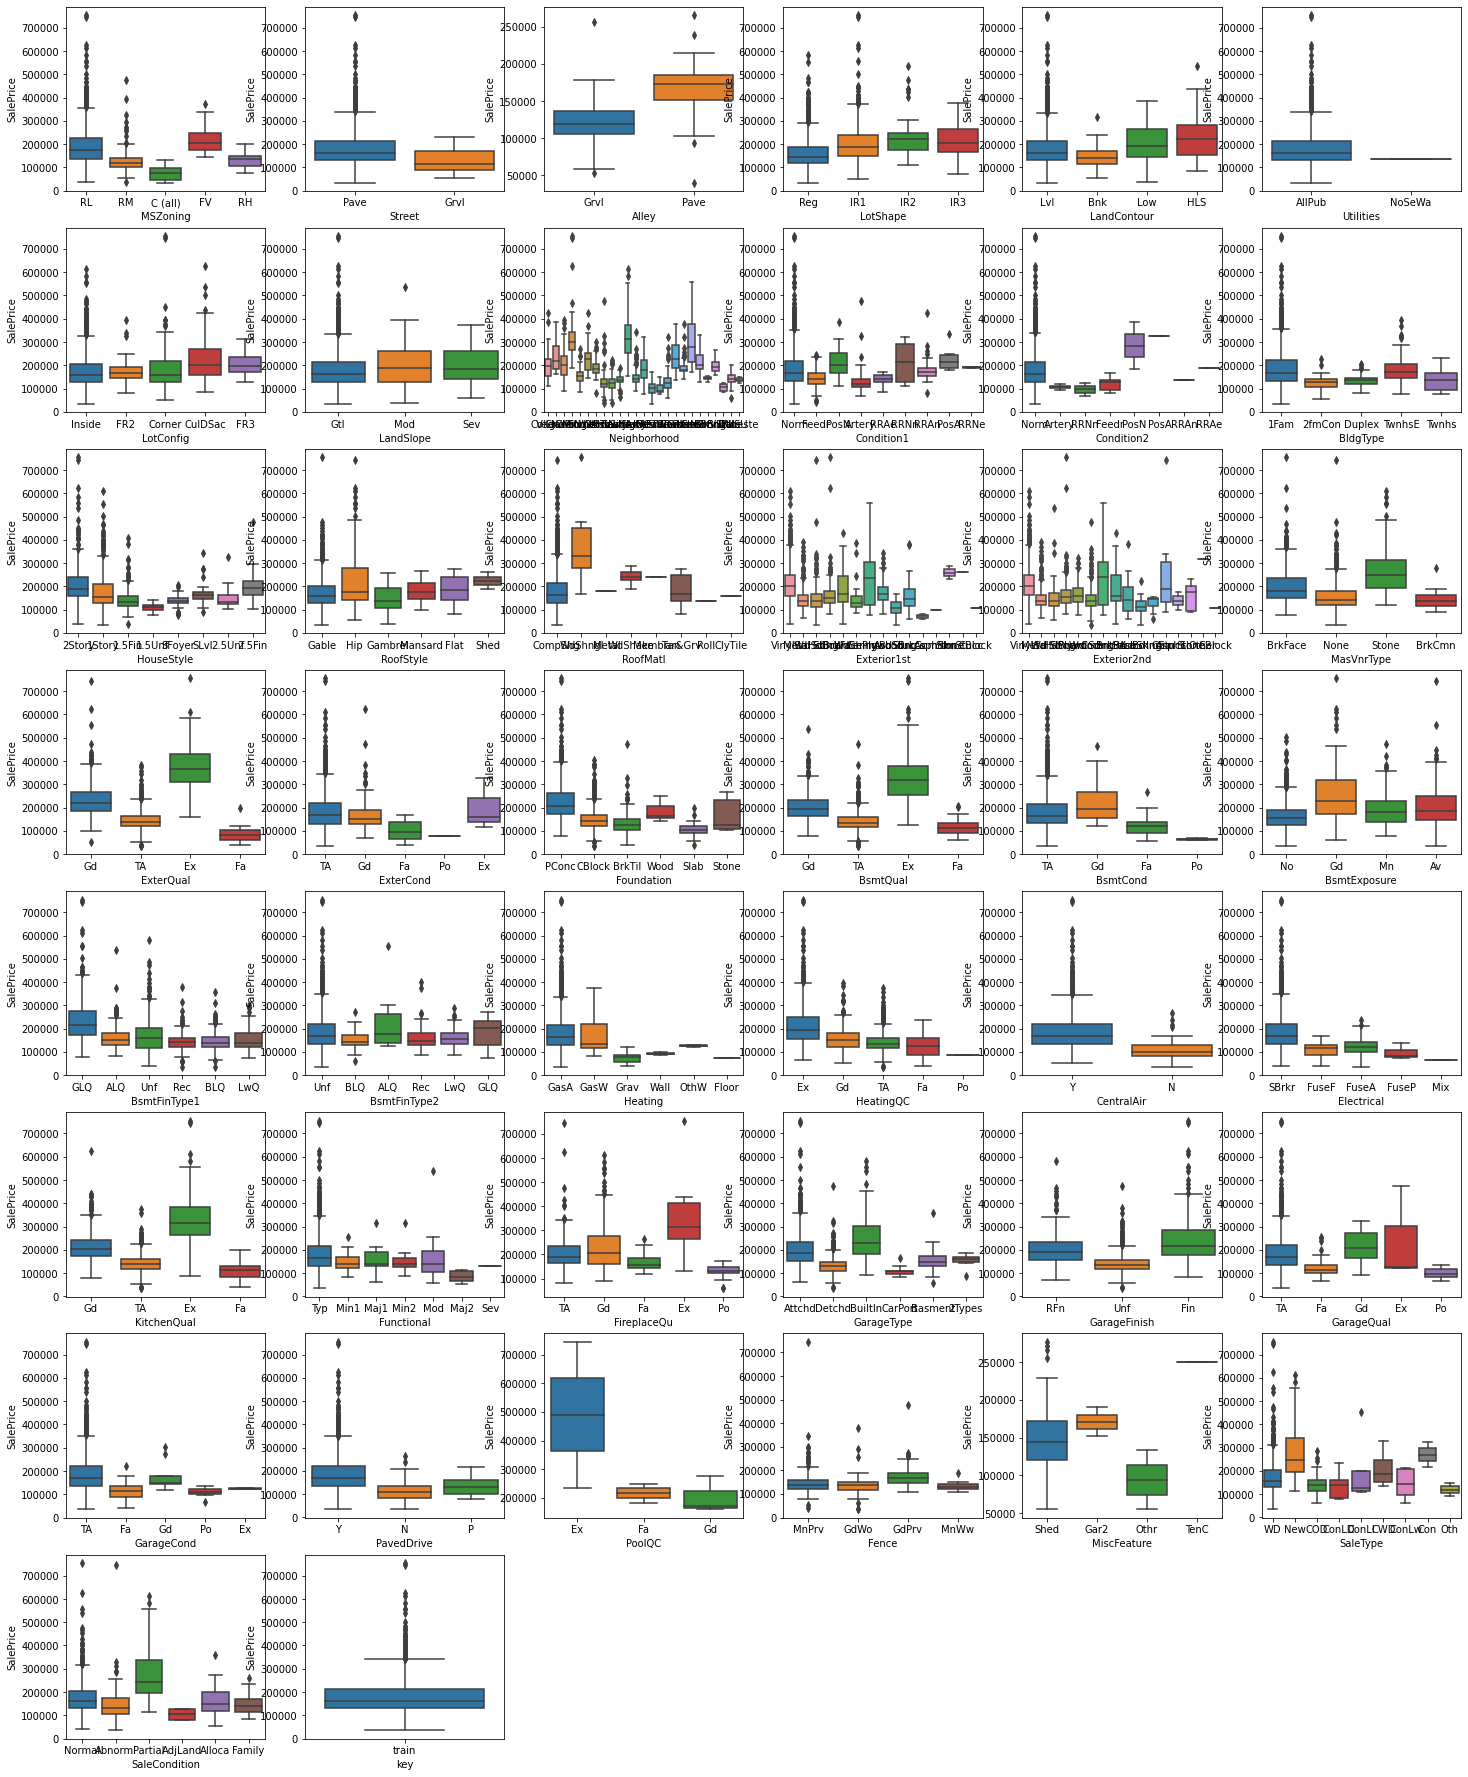

In [10]:
# Creating a list containing categorical column names
cat_cols = train.select_dtypes('object').columns

# Plotting a figure containing boxplots for categorical variables
fig = plt.figure(figsize=(25,40))

for ind, col in enumerate(cat_cols):
    plt.subplot(10,6,ind+1)
    sns.boxplot(data=train, x=col, y='SalePrice')


We can see some categorical variables where the different categories have quite different means:
- `Alley`, `Condition2`, `RoofMati`, `ExterQual`, `BsmtQual`... etc
- We can see some categories have a very low number of values. This makes it hard to use the feature in the model as it will likely overfit to categories with very few instances.
- For boxplots that represent the most popular category there are lots of outliers. This implies that very popular categories would be poor predictors of higher value properties


## 3. Dealing With Outliers

Our training data seems to contain lots of multivariate outliers that our likely to effect our model's ability to predict accurately on the training data. In this section we will identify and correct for these outliers. We will only deal with the outliers for features that had a pearson correlation higher than 0.2 with the target variable.

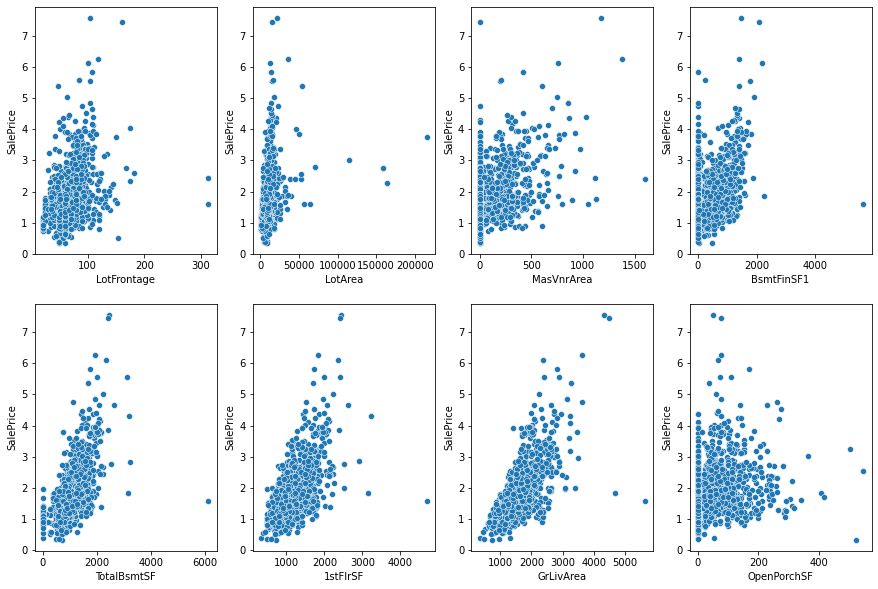

In [11]:
# Identifying visually multivariate outliers
cols_outliers = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'OpenPorchSF']

fig = plt.figure(figsize=(15,10))

for ind, col in enumerate(cols_outliers):
    ax = plt.subplot(2,4,ind+1)
    sns.scatterplot(data=train, y=train['SalePrice']/100000, x=train[col])

In [12]:
# Removing rows that contain outliers
all_data = all_data.drop(all_data[(all_data['key'] == 'train') & (all_data['LotFrontage'] > 300)].index, axis=0)
all_data = all_data.drop(all_data[(all_data['key'] == 'train') & (all_data['LotArea'] > 150000)].index, axis=0)
all_data = all_data.drop(all_data[(all_data['key'] == 'train') & (all_data['GrLivArea'] > 4000) & (all_data['SalePrice'] < 300000)].index, axis=0)

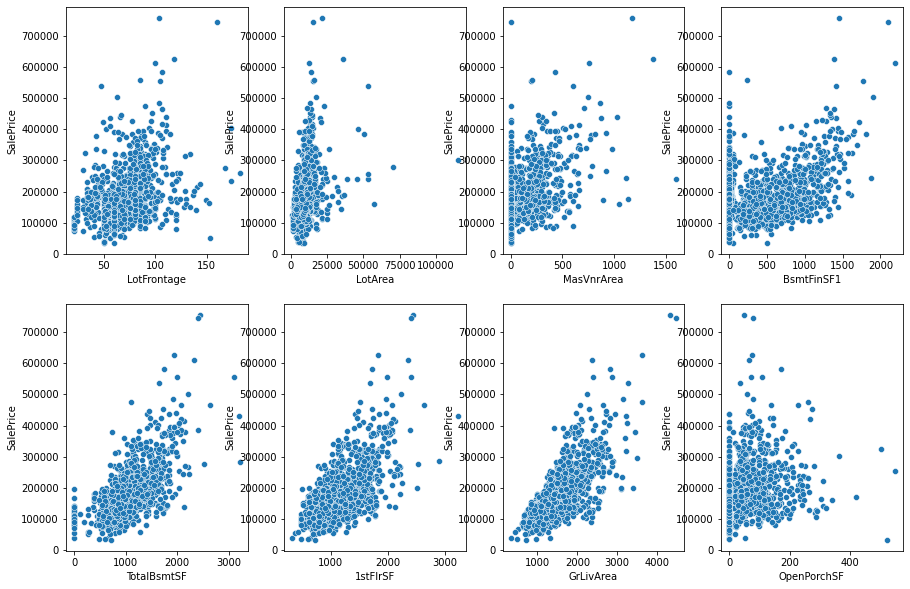

In [13]:
# Looking at how outlier removal has effected the dataset
cols_outliers = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'OpenPorchSF']

fig = plt.figure(figsize=(15,10))

for ind, col in enumerate(cols_outliers):
    ax = plt.subplot(2,4,ind+1)
    sns.scatterplot(data=all_data, y='SalePrice', x=col)

The above dealing with outliers was not very rigorous. Could have looked instead at univariate outliers and then checked more rigorously for multivariate outliers. However the rows identified and dropped increased model perfomance.

## 4. Missing Data

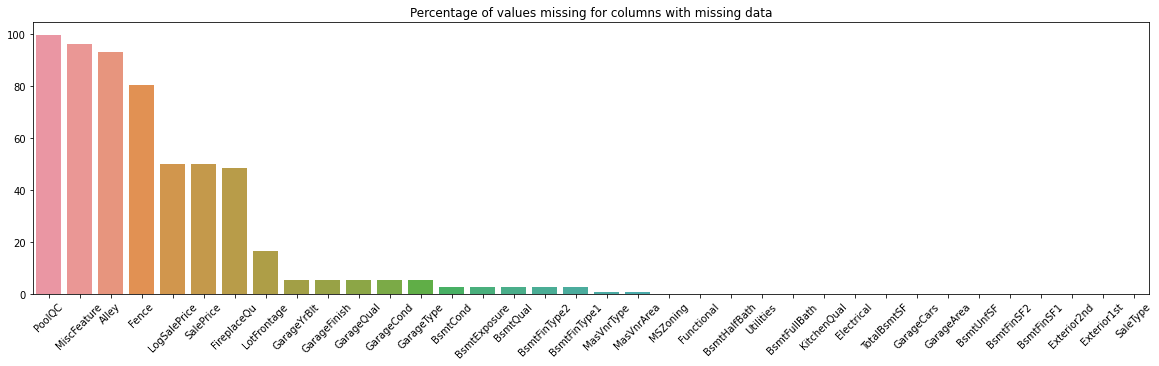

In [14]:
missing_features = all_data.isnull().sum()[all_data.isnull().sum() > 0] / all_data.shape[0] * 100
missing_features = missing_features.sort_values(ascending=False)
fig = plt.figure(figsize=(20,5))
ax = sns.barplot(y=missing_features, x=missing_features.index)
plt.title('Percentage of values missing for columns with missing data')
plt.xticks(rotation=45)
plt.show()


Observations:
- There are 4 columns with lots of missing data (80%+): `PoolQC`, `MiscFeature`, `Alley`, `Fence`.
- `LogSalePrice` and `SalePrice` can be ignored as the missing values come from the test set (as these are the target variable and its log form)
- There are 16 columns missing very little data (not even visible on the plot)

How to deal with missing data:
- Look at the source of the data to understand the columns better to know what the missing values could mean (ie: the lack of a certain characteristic in the property, genuine missing data etc)

In [15]:
# Columns to be dropped due too much missing data
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

# Missing data where missing value means the characteristic of the house doesn't exist, split into features that are categorical and numerical
lack_of_cat = [
     'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType',
    'BsmtCond', 'BsmtExposure', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 
]

lack_of_num = [
    'LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'BsmtUnfSF',
    'BsmtFinSF2', 'BsmtFinSF1'
]

# Actual missing data (the property has this 'characteristic' but the data is missing in our dataset)
unfilled_data = ['MSZoning', 'Functional', 'Utilities', 'KitchenQual', 'Electrical', 'Exterior2nd', 'Exterior1st', 'SaleType']

The above lists are the columns with missing data seperated into different lists according to why the data is missing and therefore to how we can impute the missing data. The lists where made by looking at the information provided with the dataset which explains the different features.

The columns in `lack_of_cat` and `lack_of_num` are missing data because the property lacks the characteristic related to the feature, therefore for the categorical data we can inpute 'None' and for the numerical data we can impute 0.

The `unfilled_data` columns shows columns which have missing data not caused by the actual characteristics of the house but caused by some error along the process of data collection or subsequent mistakes causing data to be lost.

Lets explore further the `unfilled_data` columns to see if we can work out how to impute the missing data

In [16]:
data_missing_subset = all_data[unfilled_data]
data_missing_subset.isna().sum()

MSZoning       4
Functional     2
Utilities      2
KitchenQual    1
Electrical     1
Exterior2nd    1
Exterior1st    1
SaleType       1
dtype: int64

There isn't much missing data for these columns and they are all categorical. Lets look at some bar charts to see if there are any obvious ways to impute the missing data

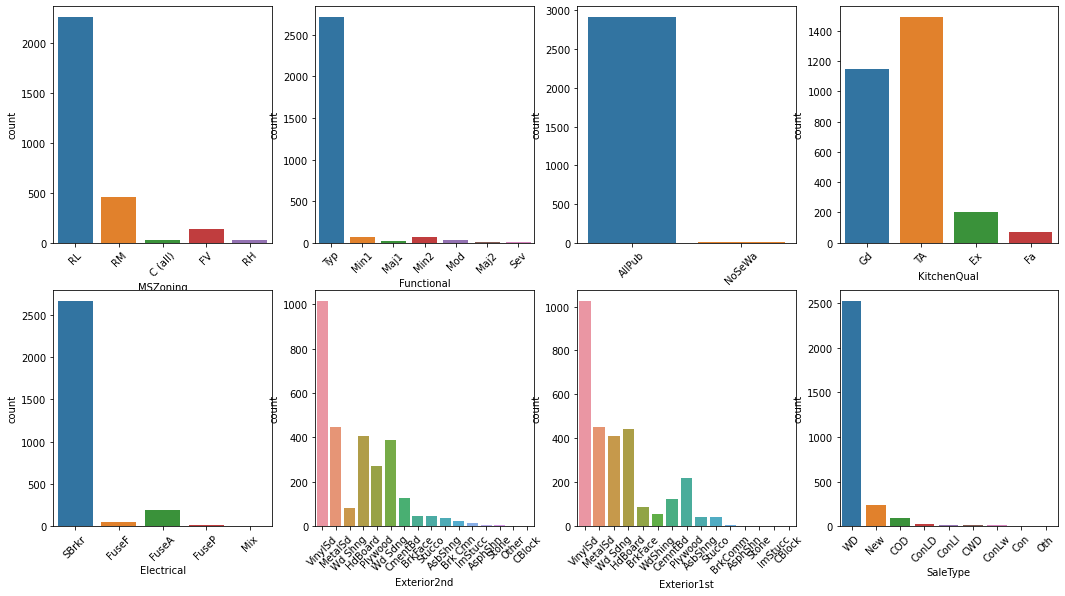

In [17]:
# Creating bar charts to show the different value frequences for features with missing data
fig = plt.figure(figsize=(18,20))

for ind, col in enumerate(unfilled_data):
    plt.subplot(4,4,ind+1)
    sns.countplot(data=all_data, x=col)
    plt.xticks(rotation=45)

plt.show()

Most features here have a clear column that has a much higher frequency than the rest, therefore we will just impute the mode for the missing values in all of these columns.

In [18]:
# Using sklearn imputer
from sklearn.impute import SimpleImputer

# Dropping columns with lots of missing data
all_data = all_data.drop(cols_to_drop, axis=1)

# For features with unfilled data imputing with the most common value for each feature
imp_most_frequent = SimpleImputer(strategy='most_frequent')
all_data[unfilled_data] = imp_most_frequent.fit_transform(all_data[unfilled_data])

# For categorical features with missing data due to lack of characterstic imputing with None
imp_none = SimpleImputer(strategy='constant', fill_value=None)
all_data[lack_of_cat] = imp_none.fit_transform(all_data[lack_of_cat])

# For numerical features with missing data due to lack of characterstic imputing with zero
imp_zero = SimpleImputer(strategy='constant', fill_value=0)
all_data[lack_of_num] = imp_zero.fit_transform(all_data[lack_of_num])


In [19]:
# Checking which features have missing data left
all_data.isnull().sum()[all_data.isnull().sum() > 0] 

SalePrice       1459
LogSalePrice    1459
dtype: int64

Now we only have missing values for the sale price related columns due to only having this information in the training data! We now have a cleaned dataset that we can use in our model building.


## Feature Engineering (ADJUST NUMBERS)

In [20]:
# Using the log of the skewed columns

from scipy.stats import skew

# Finding the column names for numerical features that are skewed
skewed_features = all_data[num_corr].apply(lambda x: skew(x))
skewed_features = skewed_features[skewed_features > 0.6]
skewed_features = skewed_features.index

# Transforming the skewed data by taking the log of the feature
all_data[skewed_features] = np.log1p(all_data[skewed_features])
print(f'A total of {len(skewed_features)} features were log transformed')


A total of 14 features were log transformed


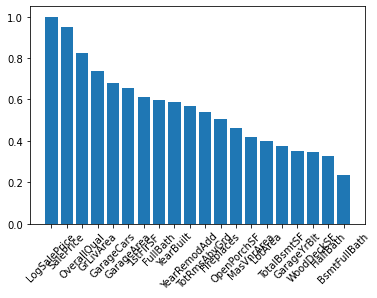

In [21]:
# Creating polynomial terms for most relevant numerical features

# Looking at which features have the highest linear correlation with target variable
correlations = all_data.corr()['LogSalePrice'].sort_values(ascending=False).head(20)
plt.bar(x=correlations.index, height=correlations)
plt.xticks(rotation=45)
plt.show()

In [22]:
# Isolating the top 10 features that have highest linear correlation with target variable 
top_10_num = all_data.corr()['LogSalePrice'].sort_values(ascending=False).head(12).index

# Adding non-linear features to the dataset
for feature in top_10_num[2:]:
    all_data[feature+'phalf'] = all_data[feature] ** 0.5
    all_data[feature+'p2'] = all_data[feature] ** 2
    all_data[feature+'p3'] = all_data[feature] ** 3
    all_data[feature+'p4'] = all_data[feature] ** 4


## 5. Feature Selection

In this section we will define the features that we will then use in our models.

### 5.1 Numerical Feature Selection
For our numerical predictors we will use all the numerical features that had a pearson correlation of above 0.2 with the `SalePrice` column. These column headings were stored in the `num_corr` variable.

In [23]:
# Defining our numerical predictors
numerical_predictors = num_corr

### 5.2 Categorical Feature Selection

{COME BACK AND JUSTIFY CAT FEATURE SELECTION}

In [24]:
# Defining the categorical predictors to use
categorical_predictors = list(all_data.select_dtypes('object').columns)
categorical_predictors.remove('key')



# 6. Data Preprocessing

In [25]:
# Selecting columns that will be used as features, target variable and the train/test key
all_data_subset = all_data[numerical_predictors + categorical_predictors + ['LogSalePrice', 'key']]

In [26]:
# Getting dummy variables for categorical variables
all_data_dummies = pd.get_dummies(all_data_subset, columns=categorical_predictors)

In [27]:
# Splitting the dataset into test/train split
train_data = all_data_dummies[all_data_dummies['key'] == 'train']
test_data = all_data_dummies[all_data_dummies['key'] == 'test']

# splitting into X_train and y_train
X_train = train_data.drop(['LogSalePrice', 'key'], axis=1)
y_train = train_data['LogSalePrice']

# splitting into X_test and y_test
X_test = test_data.drop(['LogSalePrice', 'key'], axis=1)
y_test = test_data['LogSalePrice']

In [28]:
# Scaling the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. Model Building

For this regression problem, we will use different models and compare their results. We will {INSERT MODELS}. We will test their performance over cross validation sets, look at there RMSE and MAE and submit the predictions on the test set for the model with the highest validation score.


In [29]:
from sklearn.metrics import mean_squared_error, make_scorer

# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train_scaled, y_train, scoring = scorer, cv = 10))
    return(rmse)

### 7.1 Lasso Regression

In [30]:
# Settings the alpha values to CV test over
lasso_alphas = [1, 0.1, 0.001, 0.0005]

# Calling the lasso model and fitting it to the training data
lasso = LassoCV(alphas=lasso_alphas)
lasso.fit(X_train_scaled, y_train)

# Finding the lasso mean CV score
lasso_cv = cross_val_score(lasso, X_train_scaled, y_train, cv=10).mean()

#### 7.1.1 Lasso Coefficients

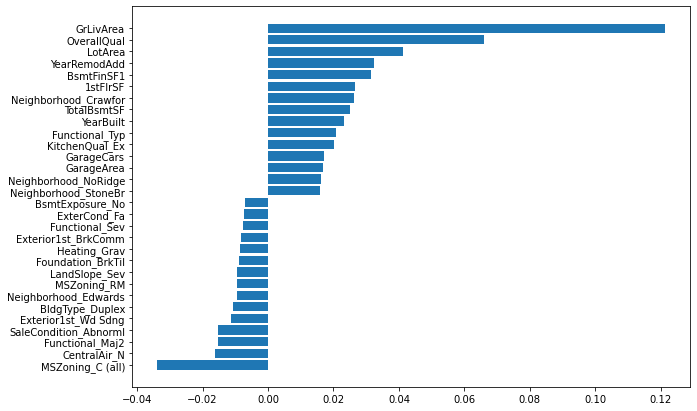

In [31]:
# Creating a series containing the most important coefficients in the lasso model
lasso_coefs = pd.Series(lasso.coef_, index=X_train.columns)
lasso_imp_coefs = pd.concat([lasso_coefs.sort_values().head(15), lasso_coefs.sort_values().tail(15)])

# Making a horizontal bar plot to show the features most important to lasso model
plt.figure(figsize=(10,7))
plt.barh(lasso_imp_coefs.index, lasso_imp_coefs)
plt.show()

Here we can see that the most important feature is the `GrLivArea` that a house has. The second most important feature is the `OverallQual` of the house and the third is the `LotArea`. These features make intuitive sense, bigger houses that have more land and are of good quality should be more expensive.

We can also see that neighbourhoods are having effects on the house price, both positively and negatively.

### 7.2 Ridge Regression

In [32]:
# Setting the alphas values for ridge model to cv test over
ridge_alphas = [50, 75, 100, 120, 130, 140, 150,160, 170, 180, 190, 200]

# Calling the model and fitting it to the training data
ridge = RidgeCV(alphas=ridge_alphas)
ridge.fit(X_train_scaled, y_train)

# Finding the mean CV score
ridge_cv = cross_val_score(ridge, X_train_scaled, y_train, cv=10).mean()

#### 7.2.1 Ridge Regression Coefficients

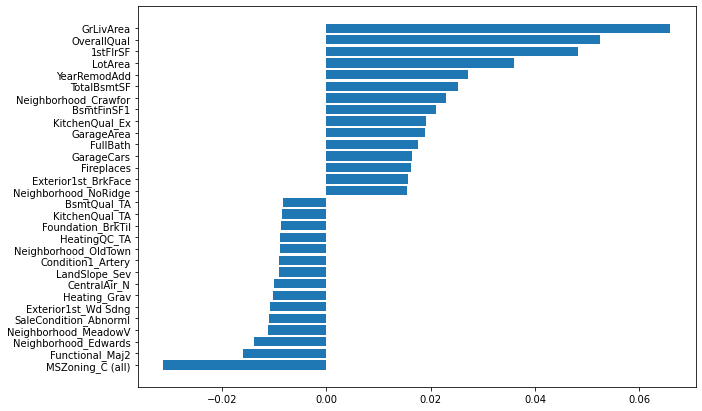

In [33]:
# Creating a series containing the most important coefficients in the ridge model
ridge_coefs = pd.Series(ridge.coef_, index=X_train.columns)
ridge_imp_coefs = pd.concat([ridge_coefs.sort_values().head(15), ridge_coefs.sort_values().tail(15)])

# Making a horizontal bar plot to show the features most important to ridge model
plt.figure(figsize=(10,7))
plt.barh(ridge_imp_coefs.index, ridge_imp_coefs)
plt.show()

In [34]:
# Finding the number of shared most important coefficients between lasso and ridge model
num_shared_coefs = len(ridge_imp_coefs.index.intersection(lasso_imp_coefs.index))
print(f"The Lasso and ridge model have {num_shared_coefs} coefficients in common in the top 30 coefficients")

The Lasso and ridge model have 21 coefficients in common in the top 30 coefficients


### 7.3 Decision Tree Regressor

In [35]:
# Calling the decision tree regressor
dtr = DecisionTreeRegressor()

# Defining the param grid to grid search over (were changed iteratively to narrow down best hyperparameters)
params = {"criterion": ["squared_error"],
              "min_samples_split": [12, 15, 17],
              "max_depth": [8, 10, 12],
              "min_samples_leaf": [18, 20, 22],
              "max_leaf_nodes": [70, 80, 90],
              }

# Calling the grid search and fitting it to the training data
dtr_grid = GridSearchCV(dtr, param_grid=params)
dtr_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [8, 10, 12],
                         'max_leaf_nodes': [70, 80, 90],
                         'min_samples_leaf': [18, 20, 22],
                         'min_samples_split': [12, 15, 17]})

In [36]:
# Having a look at the best parameters found from the gridsearch
dtr_grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_leaf_nodes': 70,
 'min_samples_leaf': 18,
 'min_samples_split': 12}

In [37]:
# Finding the mean cv score for the decision tree regressor model
dtr_cv = cross_val_score(dtr_grid.best_estimator_, X_train_scaled, y_train, cv=10).mean()

In [38]:
import xgboost

xgb = xgboost.XGBRegressor()

xgb.fit(X_train_scaled, y_train)

xgb_cv = cross_val_score(xgb, X_train_scaled, y_train, cv=10).mean()

In [39]:
def blended_predictions(X):
    return ((0.3 * ridge.predict(X)) + \
            (0.3 * lasso.predict(X)) + \
            (0.3 * xgb.predict(X)) + \
            (0.1 * dtr_grid.best_estimator_.predict(X)))

In [40]:
from sklearn.metrics import r2_score

blended_r2 = r2_score(y_train, blended_predictions(X_train_scaled))

In [41]:
blended_r2

0.9699323206122715

In [42]:
lasso_cv, ridge_cv, dtr_cv, xgb_cv, blended_r2

(0.9143543766875512,
 0.9109417015005935,
 0.798821934473414,
 0.8800548971663547,
 0.9699323206122715)

## Submission

In [43]:
# Creating the submission for the kaggle competition
test_prediction = blended_predictions(X_test_scaled)
submission = pd.DataFrame({'Id': test.index+1461, 'SalePrice': np.expm1(test_prediction)})
submission.to_csv('submission.csv', index=False)

### TODO:
General:
- Add as one of my goals to see which features are most important in house prices and mention this in the conclusion
- check section numbers are correct

Model Building
- The linear regression model can't handle the categorical features
- Add more models, SVR, XGBoost (research and understand models before using them)
- Build a combined model
- compare all models using r2 score, then look at RMSE and reisiduals etc for best model


### Questions
- How do you go about improving on model performance? Do you feature enginner or change the model you use (or which do you do first)?
- What parameters can you change for linear regression model?
- How should I structure projects so they feel less chaotic and so that each part of the project feels less dependent on other parts?
